# Visualization with ggplot

## First visualization

In [2]:
library(tidyverse) #as always
str(mpg)#ggplot‘s car data set
options(repr.plot.width=4, repr.plot.height=4)

Warning message:
"package 'tidyverse' was built under R version 3.4.4"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'tibble' was built under R version 3.4.4"Warning message:
"package 'tidyr' was built under R version 3.4.4"Warning message:
"package 'readr' was built under R version 3.4.4"Warning message:
"package 'purrr' was built under R version 3.4.4"Warning message:
"package 'dplyr' was built under R version 3.4.4"Warning message:
"package 'stringr' was built under R version 3.4.4"Warning message:
"package 'forcats' was built under R version 3.4.4"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::la

Classes 'tbl_df', 'tbl' and 'data.frame':	234 obs. of  11 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...


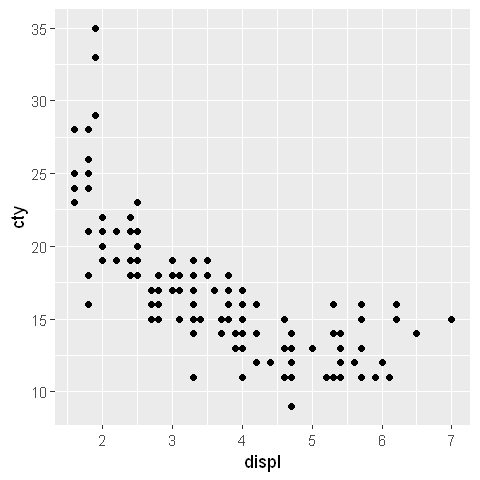

In [3]:
mpg %>% 
ggplot(aes(x=displ, y=cty)) +
geom_point()

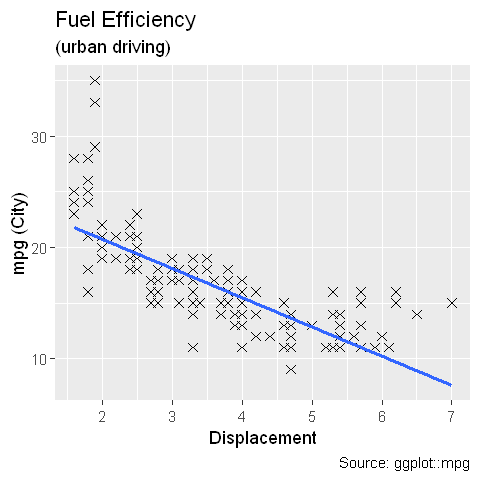

In [4]:
mpg %>%
ggplot(aes(x=displ, y=cty)) +
geom_point(size=2, shape=4) +
ylab("mpg (City)") + xlab("Displacement") +
labs(title = "Fuel Efficiency",
     subtitle = "(urban driving)",
     caption = "Source: ggplot::mpg") +
geom_smooth(se = FALSE, method = "lm")

## Up to you

In [5]:
#how many rows and columns in data set mpg
dim(mpg)

[1] 234  11

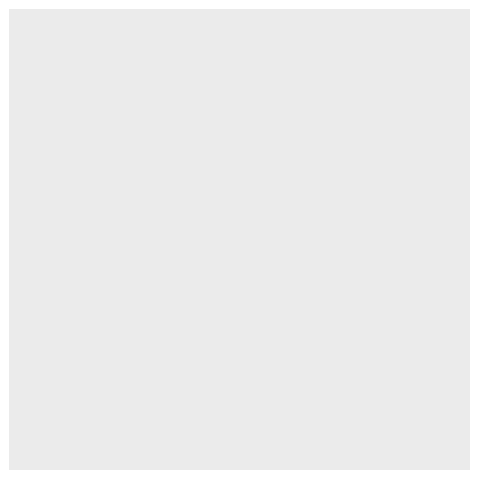

In [6]:
#Run ggplot(data = mpg). What do you see? Why?
ggplot(data = mpg) #empty because there are no layers

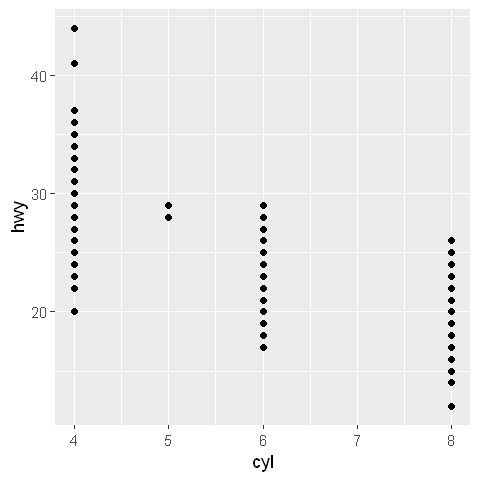

In [8]:
#Make a scatterplot of hwy vs cyl.
ggplot(data = mpg, aes(x=cyl, y=hwy)) + geom_point()

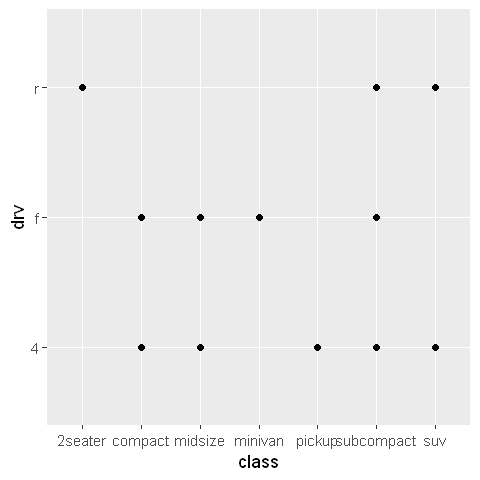

In [10]:
#What happens if you make a scatterplot of class vs drv? Why is the plot not useful?
ggplot(data = mpg, aes(x=class, y=drv)) + geom_point() # note useful as many points are overlapping

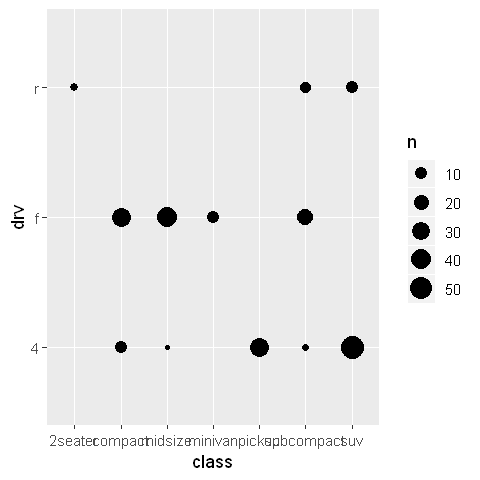

In [11]:
#Use geom_count instead of geom_point to improve this
ggplot(data = mpg, aes(x=class, y=drv)) + geom_count()

## Geoms
### Histograms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


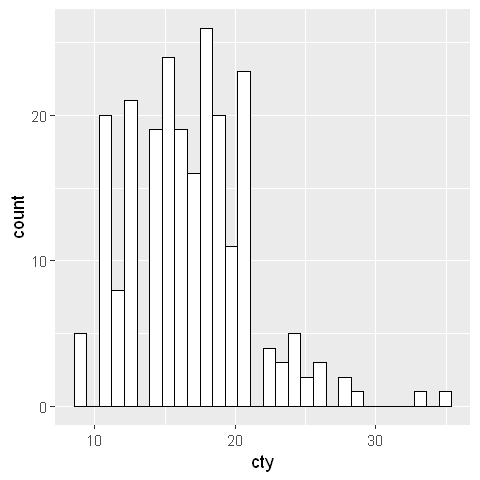

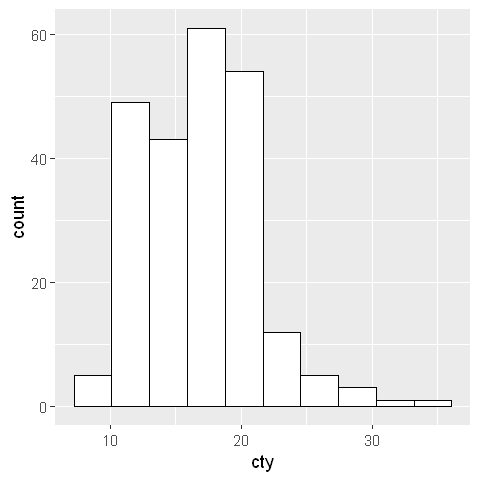

In [71]:
mpg  %>%
ggplot(aes(x=cty)) + 
geom_histogram(fill="white", color="black")

mpg  %>%
ggplot(aes(x=cty)) + 
geom_histogram(fill="white", color="black", bins=10) 

### Boxplots and Violins

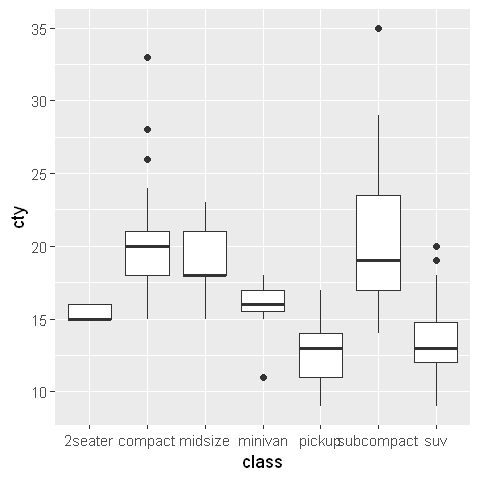

In [72]:
mpg %>%
ggplot(aes(x=class, y=cty)) + #replace class by 1 to get overall box
geom_boxplot() # replace boxplot by violin for violin charts

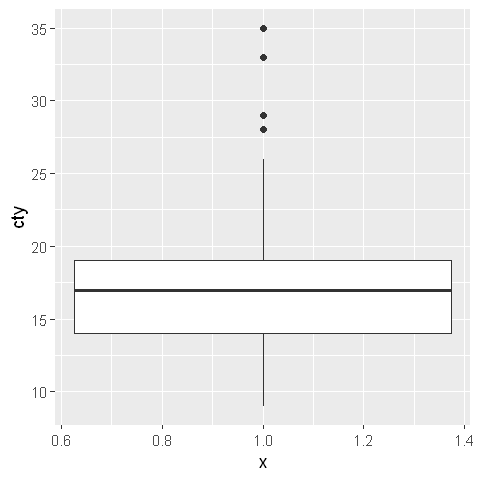

In [73]:
mpg %>%
ggplot(aes(x=1, y=cty)) +
geom_boxplot()

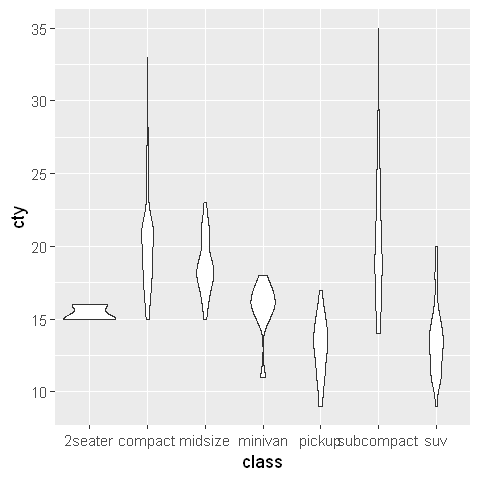

In [74]:
mpg %>%
ggplot(aes(x=class, y=cty)) +
geom_violin()

### Bars and Columns

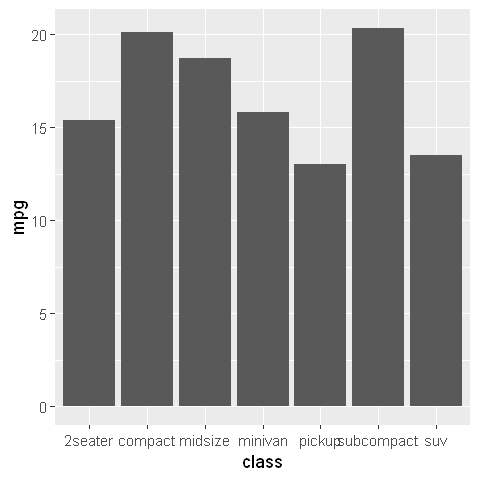

In [75]:
mpg %>%
  group_by(class) %>%
  summarize(mpg=mean(cty)) %>%
  ggplot(.,aes(y=mpg,x=class)) + geom_col()

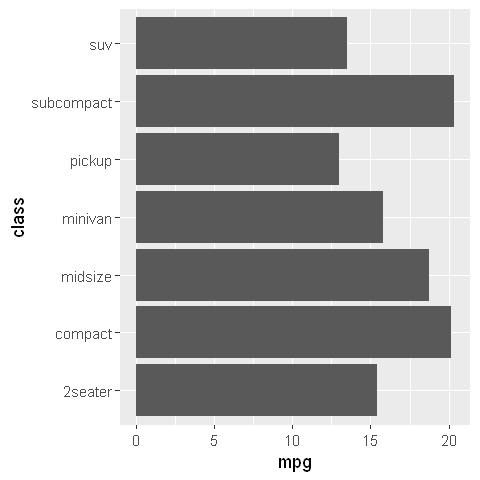

In [76]:
mpg %>%
  group_by(class) %>%
  summarize(mpg=mean(cty)) %>%
  ggplot(.,aes(y=mpg,x=class)) + geom_col() + coord_flip()

### Pie Charts and stacked Bars

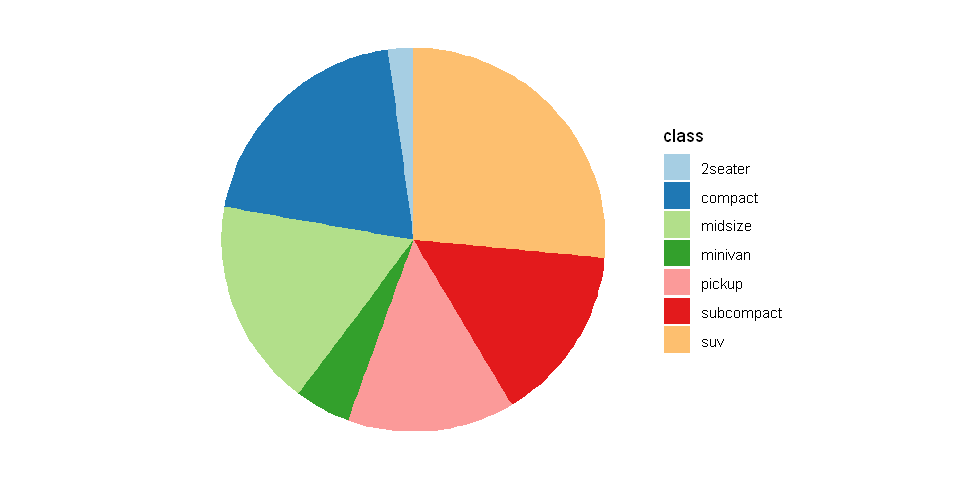

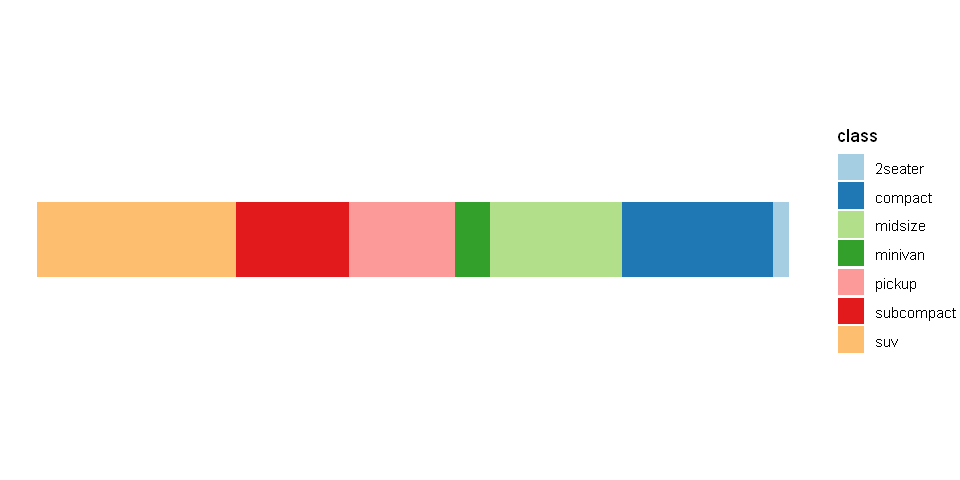

In [77]:
options(repr.plot.width=8, repr.plot.height=4)

mpg %>% 
ggplot(aes(x=1,fill=class)) +
geom_bar(position = "fill") +
scale_fill_brewer(palette="Paired") +
coord_polar("y", start = 0) +
theme_void()

mpg %>% 
ggplot(aes(x=1, fill=class)) +
geom_bar(position = "fill") +
scale_fill_brewer(palette="Paired") +
theme_void() +
theme(aspect.ratio = 0.1) +
coord_flip()

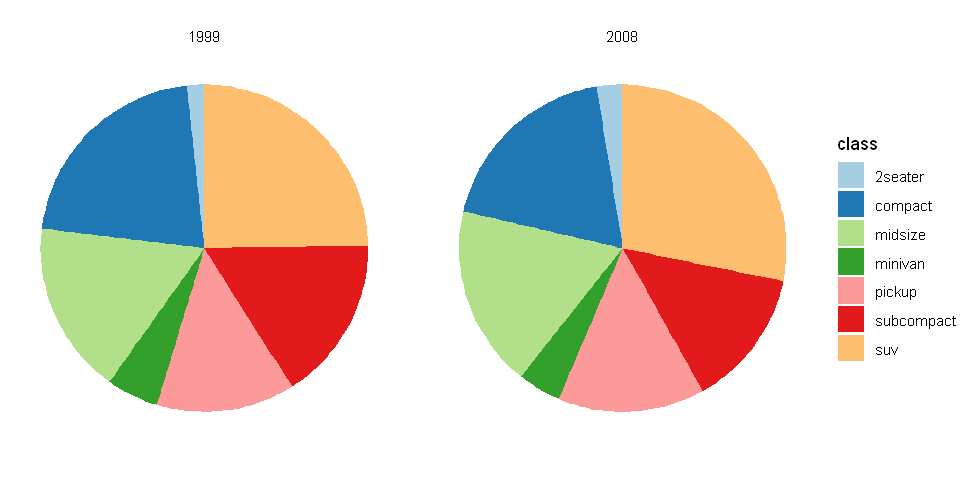

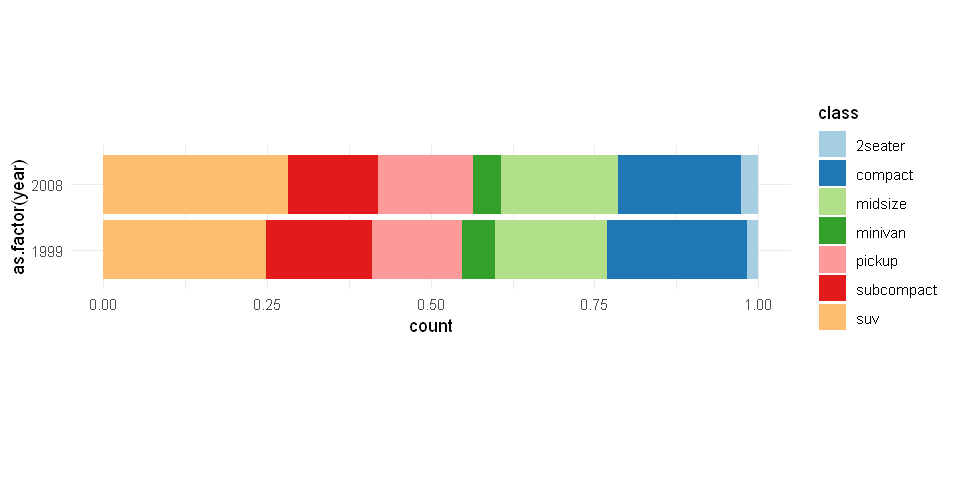

In [78]:
mpg %>% 
ggplot(aes(x=1, fill=class)) +
geom_bar(position = "fill") +
scale_fill_brewer(palette="Paired") +
coord_polar("y", start = 0) +
facet_wrap(~as.factor(year)) +
theme_void()

mpg %>% 
ggplot(aes(x=as.factor(year), fill=class)) +
geom_bar(position = "fill") +
scale_fill_brewer(palette="Paired") +
theme_minimal() +
theme(aspect.ratio = 0.2) +
coord_flip()

### Line Plots

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


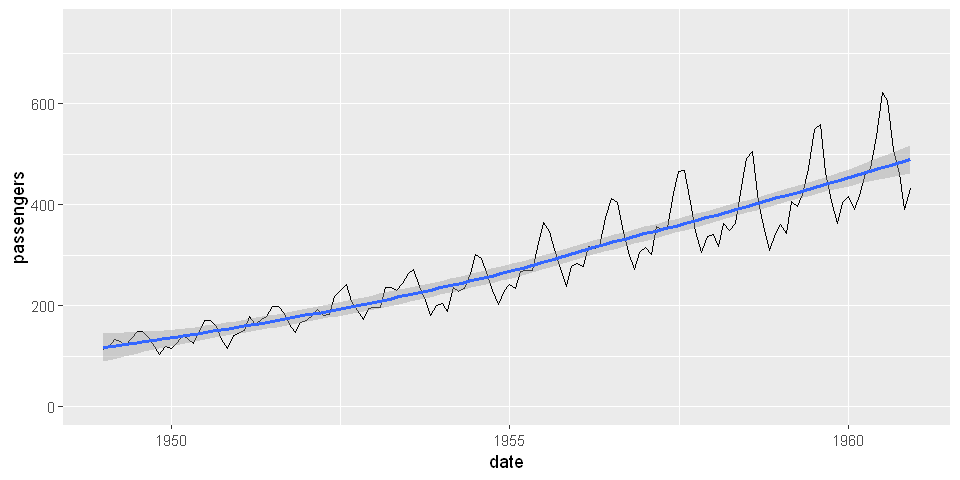

In [79]:
library(datasets)
library(lubridate)
passengers = data.frame(passengers=as.numeric(AirPassengers))
passengers %>%
mutate(year = rep(1949:1960, each=12),
         month = rep(1:12, 12),
         date = paste0(year, month),
         date = parse_date_time(date, "Ym")) %>%
ggplot(aes(x=date, y=passengers)) +
  geom_line() +
  geom_smooth() +
  ylim(0,750)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


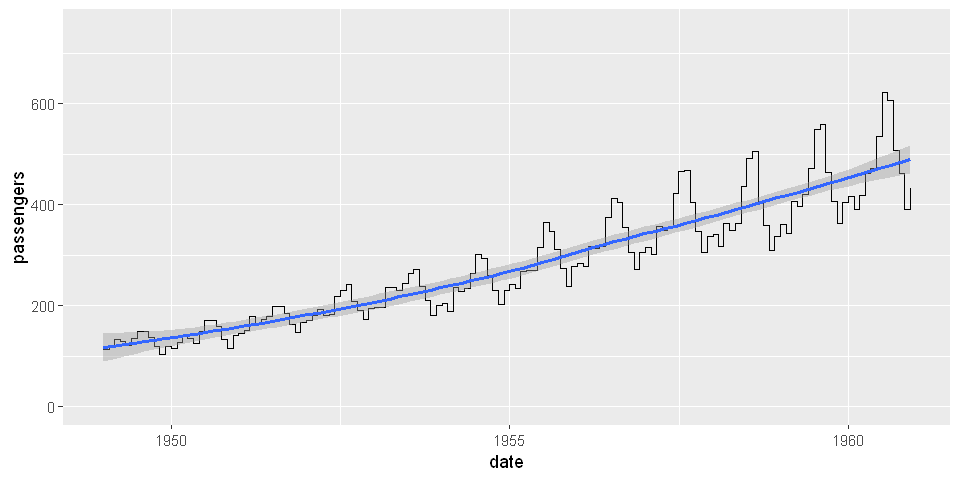

In [80]:
passengers %>%
  mutate(year = rep(1949:1960, each=12),
         month = rep(1:12, 12),
         date = paste0(year, month),
         date = parse_date_time(date, "Ym")
) %>%
ggplot(aes(x=date, y=passengers)) +
  geom_step() +
  geom_smooth() +
  ylim(0,750)

## Aesthetics
### Color and Shape

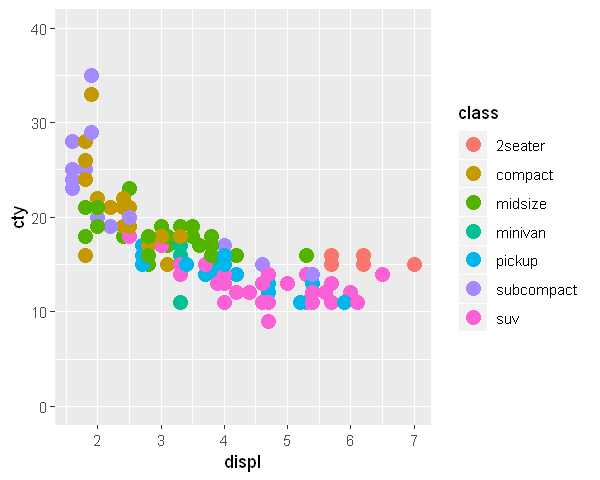

In [90]:
options(repr.plot.width=5, repr.plot.height=4)

mpg %>%
ggplot(aes(x=displ,y=cty)) +
geom_point(aes(color=class),size=4) +
ylim(0,40)

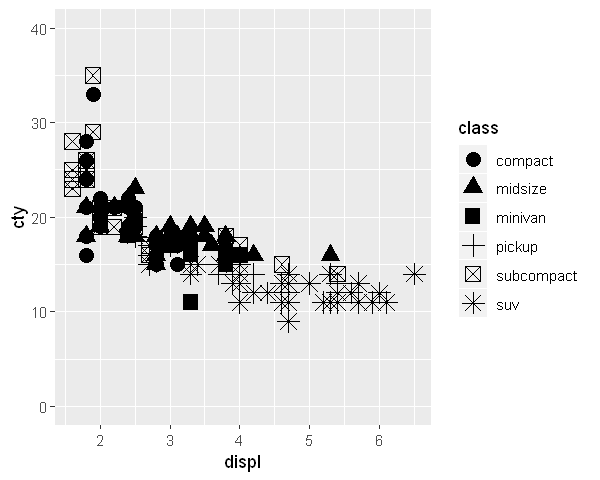

In [91]:
mpg %>%
filter(class!="2seater") %>%
ggplot(aes(x=displ,y=cty)) +
geom_point(aes(shape=class),size=4) +
ylim(0,40)

### Filling

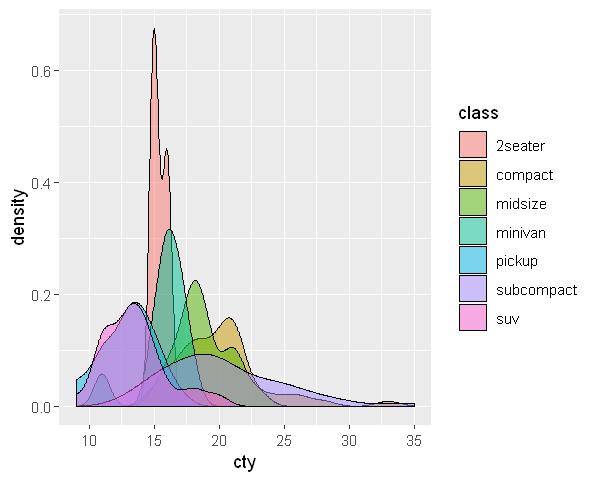

In [102]:
mpg %>%
ggplot(aes(x=cty)) +
geom_density(aes(fill=class), alpha=0.5)

## Tidying Data and Aesthetics

In [93]:
hsb2 <- read.table('http://stats.idre.ucla.edu/stat/r/faq/hsb2.csv', header=T, sep=",")
head(hsb2,10)

id,female,race,ses,schtyp,prog,read,write,math,science,socst
70,0,4,1,1,1,57,52,41,47,57
121,1,4,2,1,3,68,59,53,63,61
86,0,4,3,1,1,44,33,54,58,31
141,0,4,3,1,3,63,44,47,53,56
172,0,4,2,1,2,47,52,57,53,61
113,0,4,2,1,2,44,52,51,63,61
50,0,3,2,1,1,50,59,42,53,61
11,0,1,2,1,2,34,46,45,39,36
84,0,4,2,1,1,63,57,54,58,51
48,0,3,2,1,2,57,55,52,50,51


In [95]:
hsb2 %>%
  gather(subject, score, 7:11) %>%
  head(10)

id,female,race,ses,schtyp,prog,subject,score
70,0,4,1,1,1,read,57
121,1,4,2,1,3,read,68
86,0,4,3,1,1,read,44
141,0,4,3,1,3,read,63
172,0,4,2,1,2,read,47
113,0,4,2,1,2,read,44
50,0,3,2,1,1,read,50
11,0,1,2,1,2,read,34
84,0,4,2,1,1,read,63
48,0,3,2,1,2,read,57


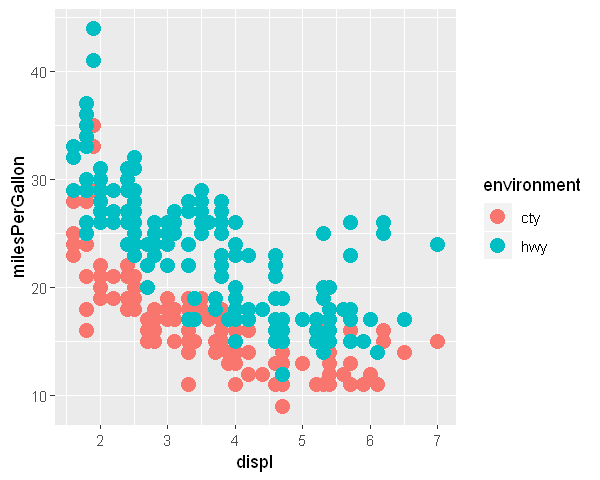

In [96]:
mpg %>%
gather(environment, milesPerGallon,8:9) %>%
ggplot(aes(x=displ, y=milesPerGallon)) +
geom_point(aes(color=environment), size=4)

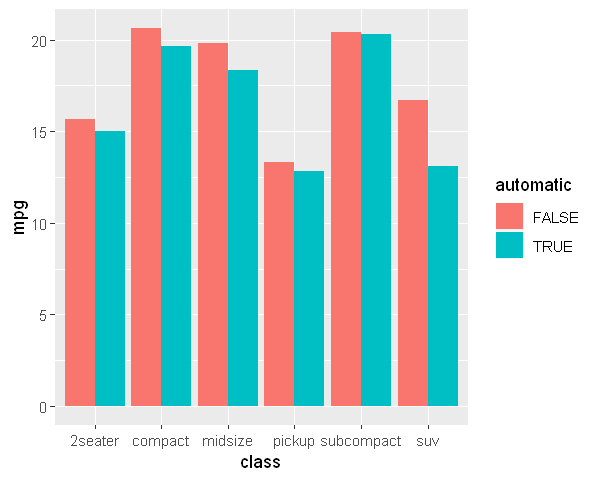

In [100]:
mpg %>%
  mutate(automatic = grepl("auto",trans)) %>%
  group_by(class,automatic) %>%
  summarize(mpg=mean(cty)) %>%
  filter(n() > 1) %>%
  ggplot(.,aes(y=mpg,x=class,fill=automatic))+
  geom_bar(stat="identity", position = "dodge")

## Facetting

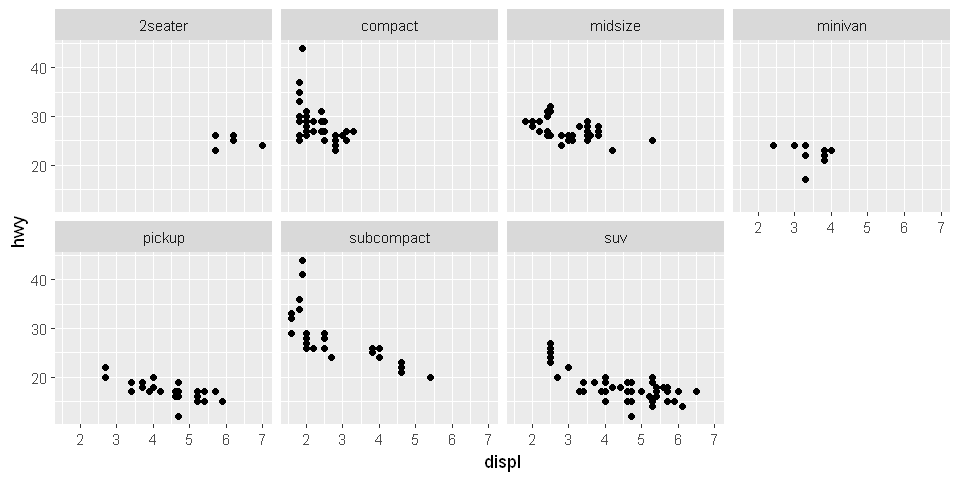

In [116]:
options(repr.plot.width=8, repr.plot.height=4)

mpg  %>% ggplot() + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 2)

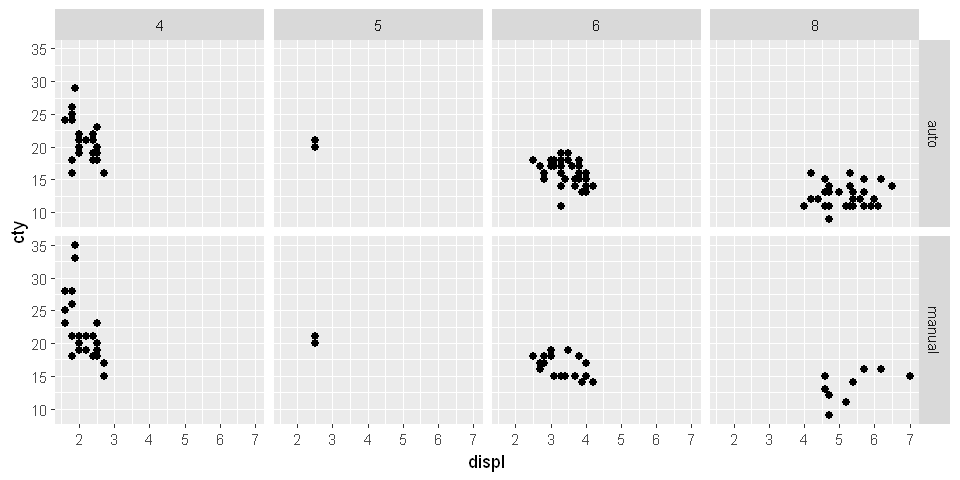

In [117]:
mpg %>%
mutate(automatic = ifelse(grepl("auto",trans),"auto","manual")) %>%
ggplot(aes(x=displ,y=cty)) + geom_point(size=2) + facet_grid(automatic~cyl)

## Combining facetting and aesthetics mapping

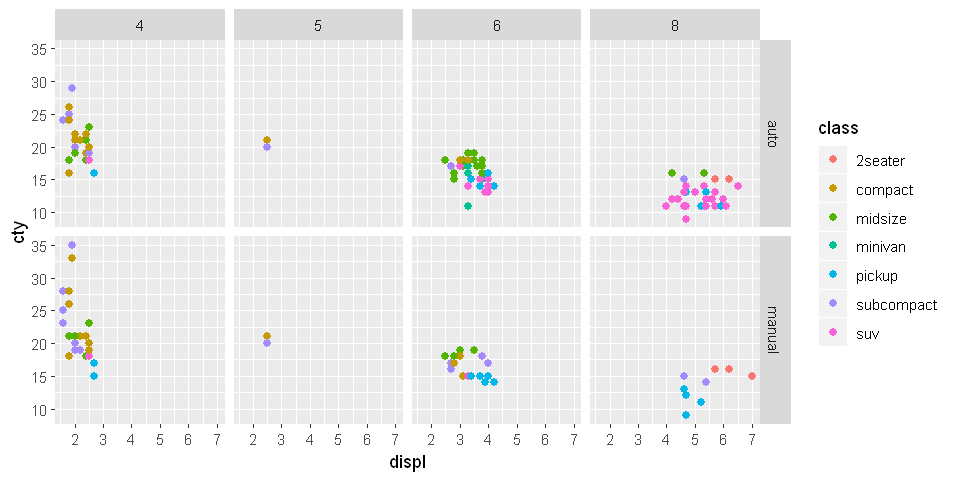

In [118]:
mpg %>%
mutate(automatic = ifelse(grepl("auto",trans),"auto","manual")) %>%
ggplot(aes(x=displ, y=cty, color=class)) + geom_point(size=2) + facet_grid(automatic~cyl)

## Your turn

In [12]:
#Read ?facet_wrap. What does nrow do? What does ncol do? What other options control the layout of the individual panels? Why doesn’t facet_grid() have nrow and ncol argument?
#facet grid creates a table with the number of rows and columns determined by the unique levels present in the data

In [121]:
#When using facet_grid() you should usually put the variable with more unique levels in the columns. Why?
# We typically have wide screen and hence should have more information in the horizontal dimension